In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE

def MAPE(actual_values, predicted_values):
    mape_sum = 0.0
    count = 0

    for actual, predicted in zip(actual_values, predicted_values):
        if actual != 0 and predicted != 0:
            mape_sum += abs((actual - predicted) / actual)
        else:
            mape_sum += abs(actual - predicted) / 100
        count += 1

    if count == 0:
        return 0  # Handle the case when there are no valid entries to avoid division by zero.

    return (mape_sum / count)[0]

In [4]:
data = np.loadtxt('./base_1_million.csv', delimiter=',')
Y = data[:,4:5]

# I/O average cost
rtreeIOavgCost = np.loadtxt('./resultOfRTreeEstimation estimation-IOCount-duration.csv', delimiter=',')[:, 1:2].mean()
print("RTree I/O avg cost :", rtreeIOavgCost)

# Average time to estimate
rtreeAvgTimeToEstimate = np.loadtxt('./resultOfRTreeEstimation estimation-IOCount-duration.csv', delimiter=',')[:, 2:3].mean()
print("RTree I/O avg time to estimate :", rtreeAvgTimeToEstimate/1000000, "s")

# Score of the RTree MAE
maeRtree = MAE(Y[:4172], np.loadtxt('./resultOfRTreeEstimation estimation-IOCount-duration.csv', delimiter=',')[0:4172, 0:1])
print("Mean absolute error of the RTree: ", maeRtree)

# Score of the RTree MAPE
mapeRtree = MAPE(Y[:4172], np.loadtxt('./resultOfRTreeEstimation estimation-IOCount-duration.csv', delimiter=',')[0:4172, 0:1])
print(f"Mean absolute percentage error of the RTree: {mapeRtree:.2%}")

RTree I/O avg cost : 12026.899328859061
RTree I/O avg time to estimate : 1.4007721052253115 s
Mean absolute error of the RTree:  17543.343720038352
Mean absolute percentage error of the RTree: 10925.99%


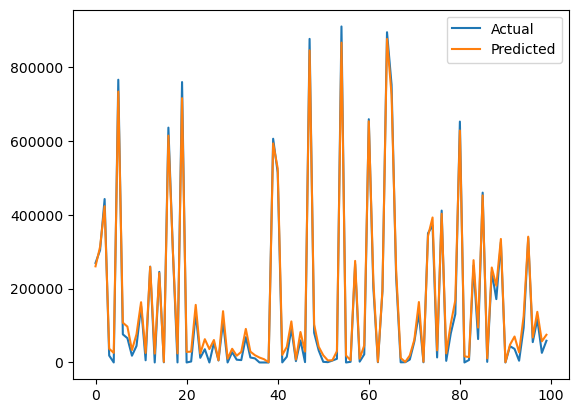

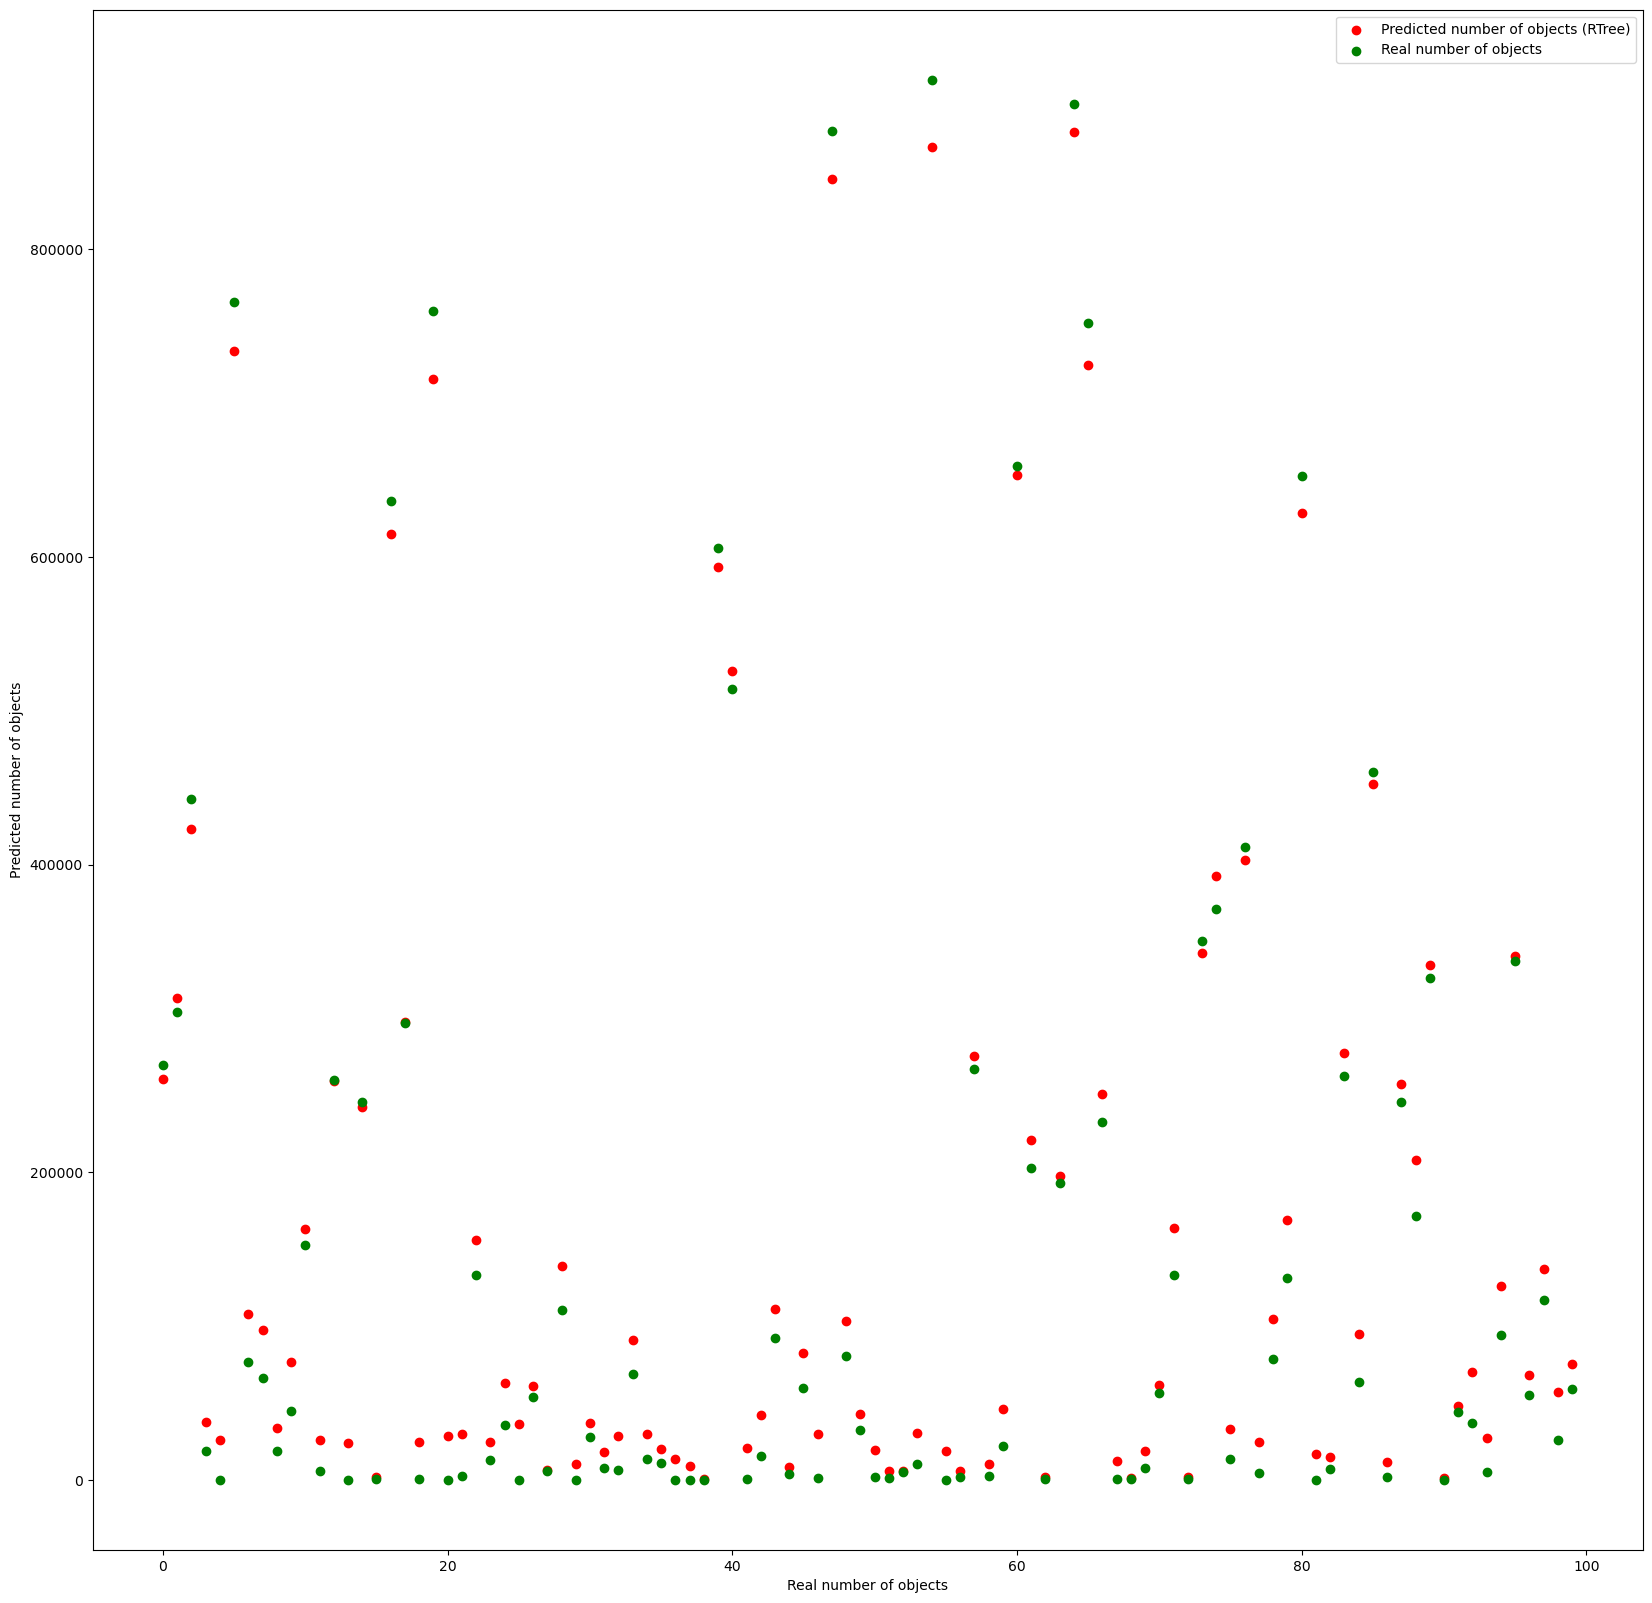

In [6]:
# RTree predictions
rtreePredictions = np.loadtxt('./resultOfRTreeEstimation estimation-IOCount-duration.csv', delimiter=',')[0:100, 0:1]

# Plot the RTree predictions
plt.plot(Y[:100], label='Actual')
plt.plot(rtreePredictions, label='Predicted')
plt.legend()
plt.show()

# Scatter plot of the RTree predictions
plt.figure(figsize=(20, 20))
plt.scatter(range(100), rtreePredictions, c='red', label='Predicted number of objects (RTree)')
plt.scatter(range(100), Y[:100], c='green', label='Real number of objects')
plt.xlabel('Real number of objects')
plt.ylabel('Predicted number of objects')
plt.legend()
plt.show()